<a href="https://colab.research.google.com/github/Bryscax/Moringa_09/blob/master/Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**

**Key Questions**

How can we use historical aviation data to improve safety and efficiency in the aviation industry?

What actionable insights can be derived from aviation incidents to guide future business decisions?

**Additional Questions**

Which phases of flight are most prone to incidents?

Are incidents more likely under adverse weather conditions?

How do injury severities vary with time and aircraft damage types?

Which months and years have the highest aviation incident rates?

Are certain regions more prone to aviation incidents?

**Step 2: Data Understanding**

Data Overview:

Dataset includes aviation accident data from 1962 to 2023.

Key columns: Injury Severity, Weather Condition, Phase of Flight, Aircraft
Damage, Fatalities, Incident Dates.

Geographical focus: United States and international waters.

Missing values and inconsistencies require cleaning and imputation.

**Step 3: Analysis Plan**

Tasks

Data Cleaning:

Handle missing values (imputation, removal, or categorization as "unknown").
Ensure data types are consistent (e.g., convert date strings to datetime).
Exploratory Data Analysis (EDA)

Univariate Analysis: Explore distributions of key variables like injury severity, weather condition, and phase of flight.

Bivariate Analysis: Investigate relationships between variables (e.g., weather and injury severity, phase of flight and fatalities).

Time Series Analysis: Assess trends in aviation incidents over time.

Interactive Dashboard Creation:
Use Plotly Dash, Tableau, or Power BI to create an interactive dashboard for stakeholders to explore key metrics dynamically.

Insights for Business Recommendations:

Identify patterns and trends to guide actionable insights.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = '/content/AviationData.csv'
aviation_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preview the data
print("First 5 rows of the dataset:")
aviation_data.head()



First 5 rows of the dataset:


<ipython-input-2-25289dbc7f1a>:8: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv(file_path, encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
# Check missing data percentages
missing_data = aviation_data.isnull().sum() / len(aviation_data) * 100
print(missing_data[missing_data > 0])  # Show columns with missing values

# Fill missing values or drop columns with excessive missing data
aviation_data_cleaned = aviation_data.drop(columns=['Latitude', 'Longitude', 'Aircraft.Category'])
aviation_data_cleaned = aviation_data_cleaned.fillna('Unknown')


Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30.560587
Report.Status              7.181991
Publication.Date          15.492356
dtype: float64


There are so many missing data for each column.

In [ ]:
print("\nDataset Info:")
print(aviation_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                   

This shows the data types in the columns

In [ ]:
# Convert Event.Date to datetime
aviation_data_cleaned['Event.Date'] = pd.to_datetime(aviation_data_cleaned['Event.Date'], errors='coerce')

# Create additional time-related features
aviation_data_cleaned['Year'] = aviation_data_cleaned['Event.Date'].dt.year
aviation_data_cleaned['Month'] = aviation_data_cleaned['Event.Date'].dt.month
aviation_data_cleaned['Day'] = aviation_data_cleaned['Event.Date'].dt.day

print("\nPreview with new time-related features:")
print(aviation_data_cleaned[['Event.Date', 'Year', 'Month', 'Day']].head())



Preview with new time-related features:
     Event.Date  Year  Month  Day
2    1974-08-30  1974      8   30
5    1979-09-17  1979      9   17
593  1982-03-16  1982      3   16
3654 1983-01-08  1983      1    8
6202 1983-09-09  1983      9    9


<ipython-input-6-311b7a0f5b94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_cleaned['Event.Date'] = pd.to_datetime(aviation_data_cleaned['Event.Date'], errors='coerce')
<ipython-input-6-311b7a0f5b94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_cleaned['Year'] = aviation_data_cleaned['Event.Date'].dt.year
<ipython-input-6-311b7a0f5b94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

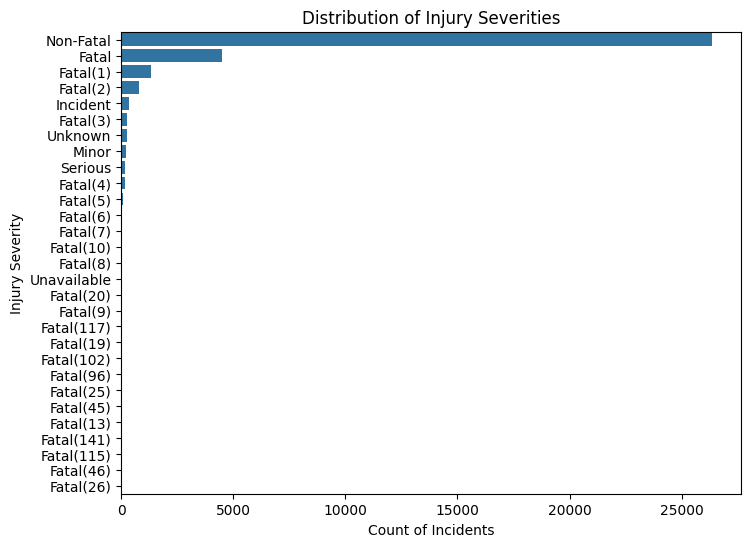

In [ ]:
# Univariate Analysis
# Visualize injury severity distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=aviation_data_cleaned, y='Injury.Severity', order=aviation_data_cleaned['Injury.Severity'].value_counts().index)
plt.title('Distribution of Injury Severities')
plt.xlabel('Count of Incidents')
plt.ylabel('Injury Severity')
plt.show()


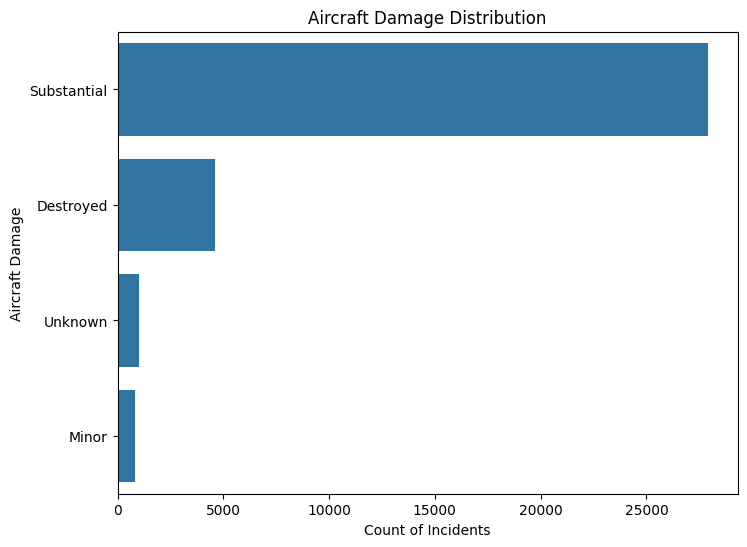

In [ ]:
# Aircraft Damage Distribution
# Visualize damage distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=aviation_data_cleaned, y='Aircraft.damage', order=aviation_data_cleaned['Aircraft.damage'].value_counts().index)
plt.title('Aircraft Damage Distribution')
plt.xlabel('Count of Incidents')
plt.ylabel('Aircraft Damage')
plt.show()


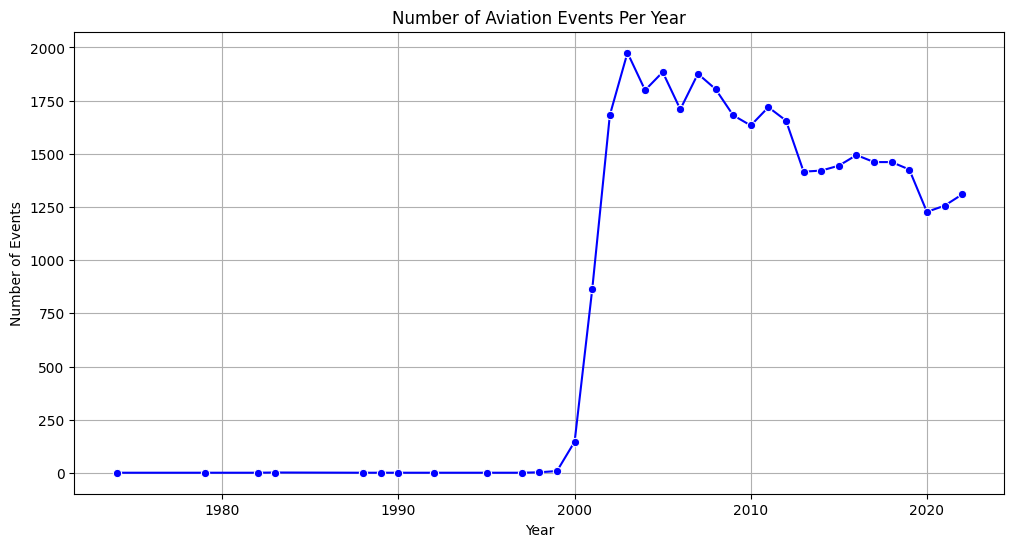

In [ ]:
# Bivariate Analysis
#Yearly distribution of events
yearly_events = aviation_data_cleaned['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_events.index, y=yearly_events.values, marker='o', color='blue')
plt.title('Number of Aviation Events Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid()
plt.show()


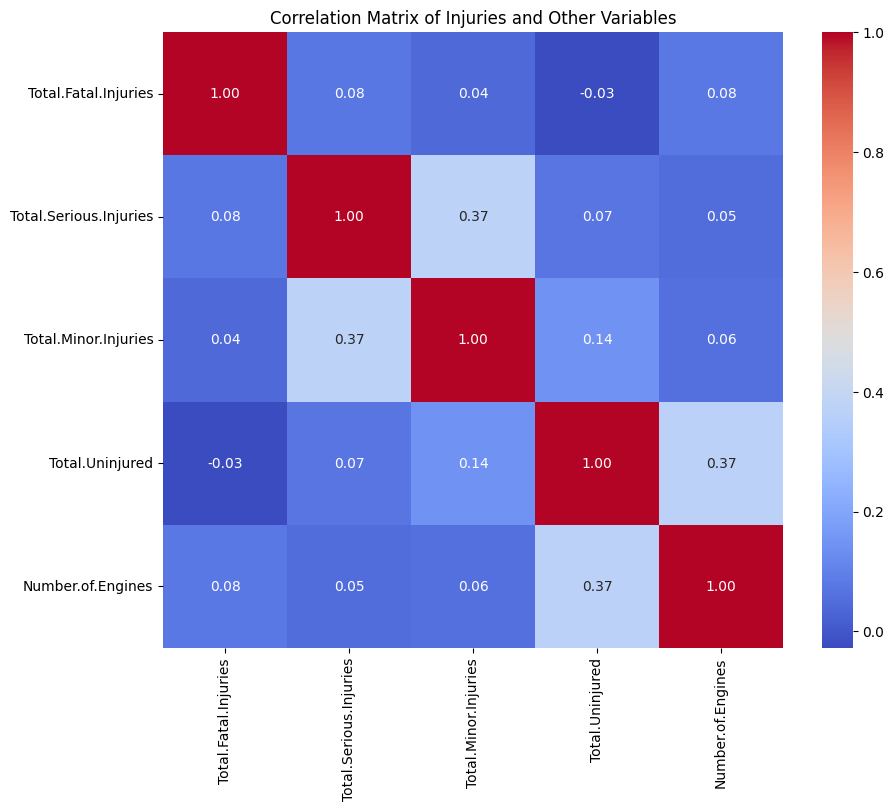

In [ ]:
# Correlation matrix for numerical columns
numeric_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']
corr_matrix = aviation_data_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Injuries and Other Variables')
plt.show()



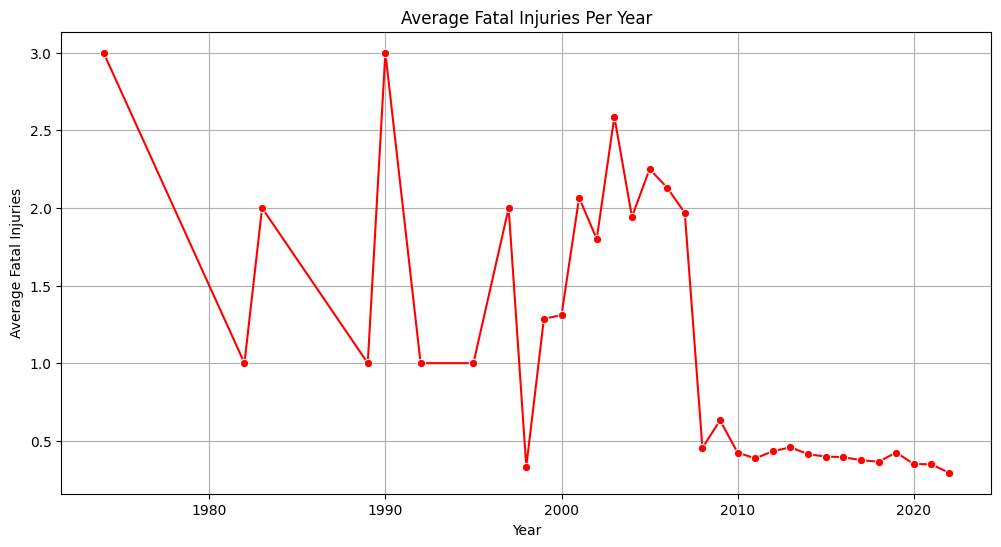

In [ ]:
# Average Fatal Injuries by Year
yearly_fatal_injuries = aviation_data_cleaned.groupby('Year')['Total.Fatal.Injuries'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_fatal_injuries.index, y=yearly_fatal_injuries.values, marker='o', color='red')
plt.title('Average Fatal Injuries Per Year')
plt.xlabel('Year')
plt.ylabel('Average Fatal Injuries')
plt.grid()
plt.show()


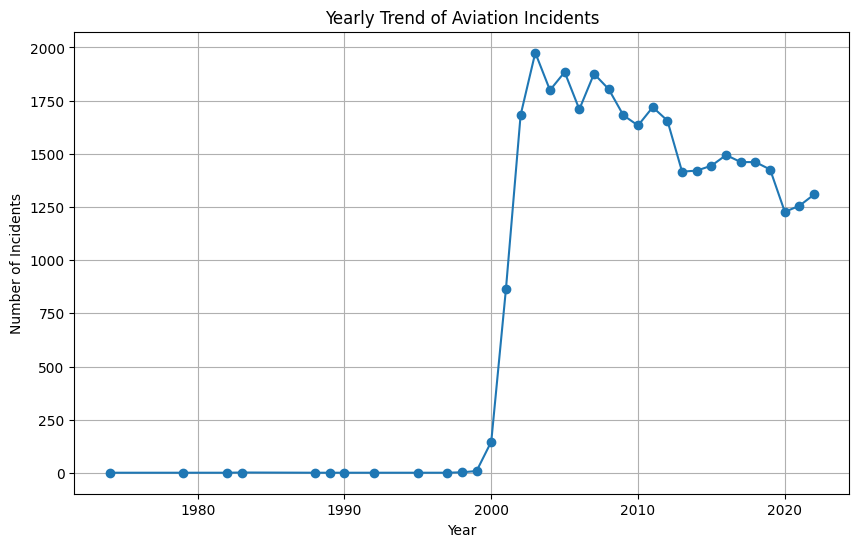

In [ ]:
#Trend Analysis
#Incidents Over Time
# Extract year and group by year
aviation_data_cleaned['Year'] = pd.to_datetime(aviation_data_cleaned['Event.Date']).dt.year
yearly_trends = aviation_data_cleaned['Year'].value_counts().sort_index()

# Plot trends
yearly_trends.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Yearly Trend of Aviation Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid()
plt.show()


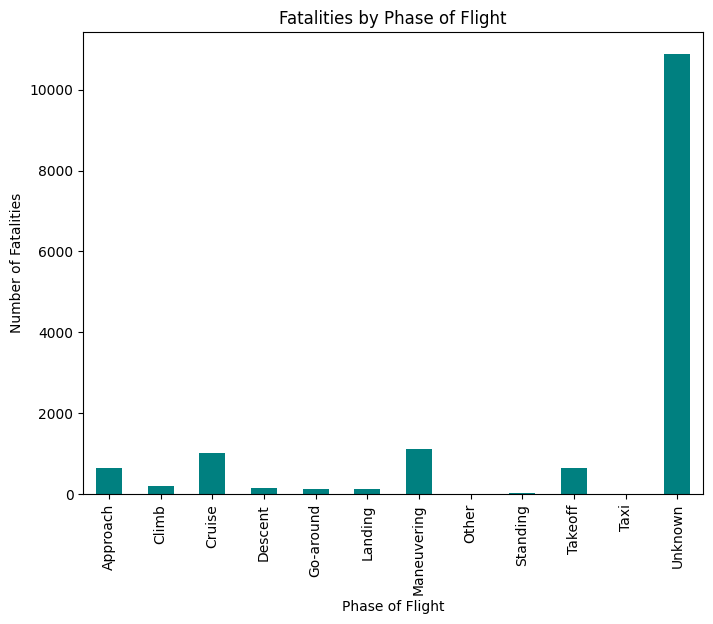

In [ ]:
# Group by phase of flight
fatalities_by_phase = aviation_data_cleaned.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum()

# Bar Plot
fatalities_by_phase.plot(kind='bar', figsize=(8, 6), color='teal')
plt.title('Fatalities by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Fatalities')
plt.show()

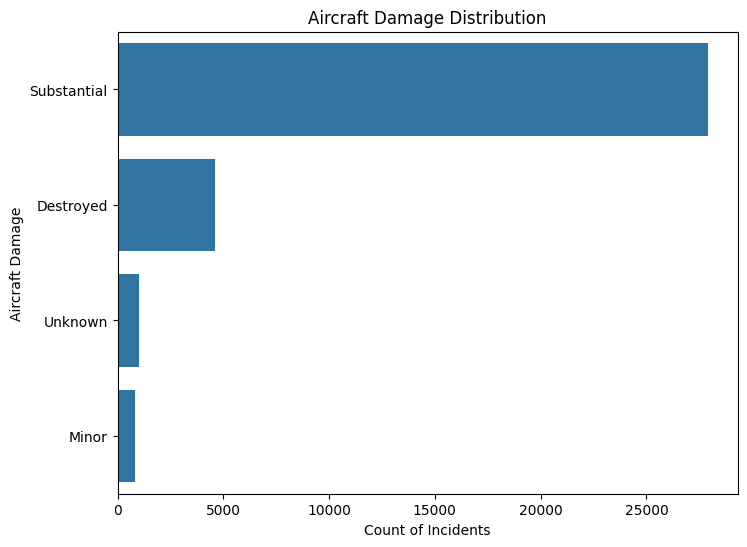

In [ ]:
# Aircraft Damage Distribution
# Visualize damage distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=aviation_data_cleaned, y='Aircraft.damage', order=aviation_data_cleaned['Aircraft.damage'].value_counts().index)
plt.title('Aircraft Damage Distribution')
plt.xlabel('Count of Incidents')
plt.ylabel('Aircraft Damage')
plt.show()


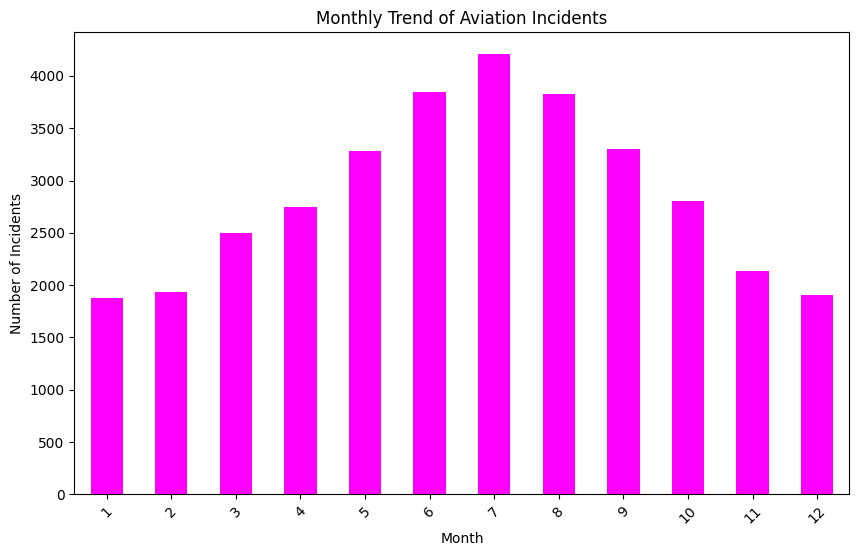

In [ ]:
# Monthly Trends in Aviation Incidents
# Create 'Month' column
aviation_data_cleaned['Month'] = pd.to_datetime(aviation_data_cleaned['Event.Date']).dt.month

# Monthly incident count
monthly_trends = aviation_data_cleaned['Month'].value_counts().sort_index()

# Plot monthly trend
monthly_trends.plot(kind='bar', figsize=(10, 6), color='magenta')
plt.title('Monthly Trend of Aviation Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


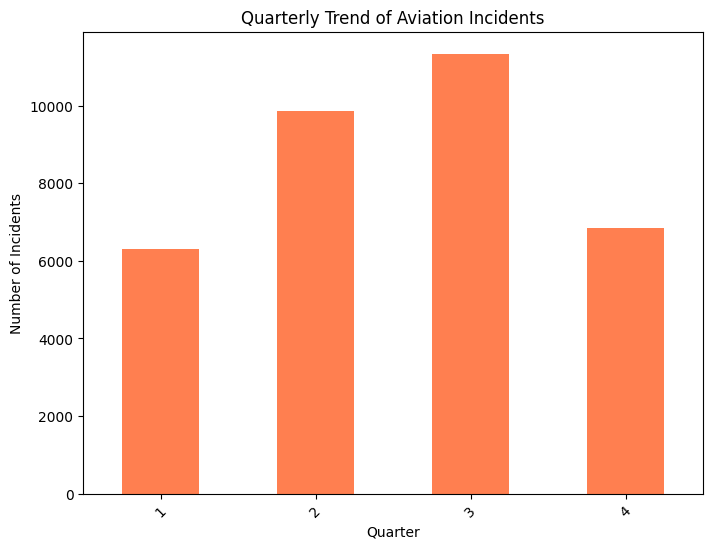

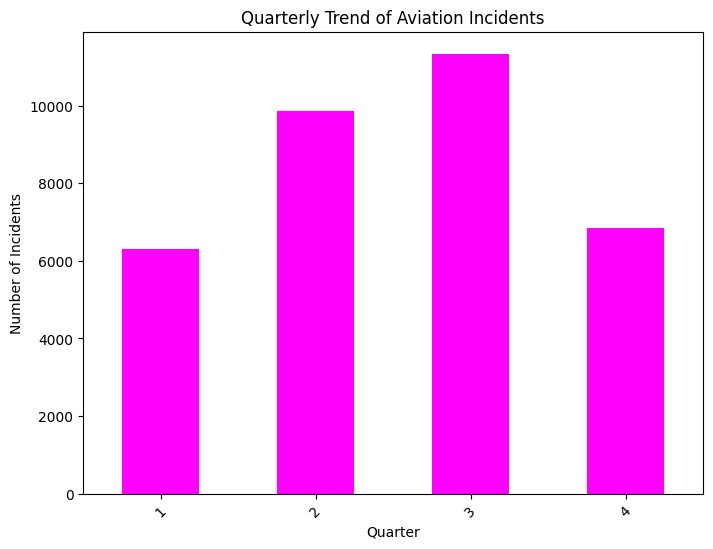

In [ ]:
#  Create 'Quarter' column
aviation_data_cleaned['Quarter'] = pd.to_datetime(aviation_data_cleaned['Event.Date']).dt.quarter

# Quarterly incident count
quarterly_trends = aviation_data_cleaned['Quarter'].value_counts().sort_index()

# Plot quarterly trends
quarterly_trends.plot(kind='bar', figsize=(8, 6), color='coral')
plt.title('Quarterly Trend of Aviation Incidents')
plt.xlabel('Quarter')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

# Create 'Quarter' column
aviation_data_cleaned['Quarter'] = pd.to_datetime(aviation_data_cleaned['Event.Date']).dt.quarter

# Quarterly incident count
quarterly_trends = aviation_data_cleaned['Quarter'].value_counts().sort_index()

# Plot quarterly trends
quarterly_trends.plot(kind='bar', figsize=(8, 6), color='magenta')
plt.title('Quarterly Trend of Aviation Incidents')
plt.xlabel('Quarter')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


**Step 6: Recommendations**

1. Improve Safety During Critical Flight Phases- Incidents are most frequent during takeoff and landing.
Recommendation: Invest in advanced monitoring systems and pilot training for these phases.

2. Develop Weather-Responsive Safety Protocols- Adverse weather is linked to severe incidents.
Recommendation- Implement stricter weather-related protocols for flight approvals.

3. Strengthen Maintenance Policies- Significant aircraft damage correlates with higher injury severities.
Recommendation: Enhance maintenance checks and implement predictive maintenance using historical data.